## The analysis of the european football dataset 
The credentials for the dataset go to Dima Rudov who uploaded in on Kaggle (https://www.kaggle.com/code/dimarudov/data-analysis-using-sql/data).

The dataset contains the following tables: Country, League, Match, Player, Player_Attributes, Team, Team_Attributes.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [90]:
con = sqlite3.connect("soccer.sqlite")
df = pd.read_sql_query(
"""SELECT
count(CASE WHEN birthday < '1970-01-01' THEN 1 END) AS 'before 1970',
count(CASE WHEN birthday >= '1970-01-01' AND birthday < '1980-01-01' THEN 1 END) AS '1970-1980',
count(CASE WHEN birthday >= '1980-01-01' AND birthday < '1990-01-01' THEN 1 END) AS '1980-1990',
count(CASE WHEN birthday >= '1990-01-01' THEN 1 END) AS 'after 1990'
FROM Player""", con)

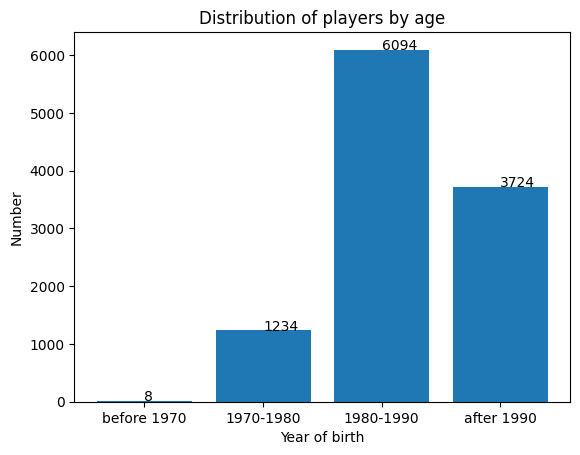

In [104]:
def add_value_label(x_list,y_list):
    for i in range(len(x_list)):
        plt.text(i,y_list[i],y_list[i])

plt.bar(df.columns, df.values.tolist()[0])
add_value_label(df.columns, df.values.tolist()[0])
plt.title('Distribution of players by age')
plt.xlabel('Year of birth')
plt.ylabel('Number')
plt.show()

The barplot above shows that the majority of football players who played in european leagues in the period 2008-2016 were born between 1980 and 1990. Veterans, born before 1970, make up much less than 1%.

In [142]:
df1 = pd.read_sql_query(
"""SELECT COUNT(home_team_goal) as num_goals, Season
FROM Match
GROUP BY Season""", con)

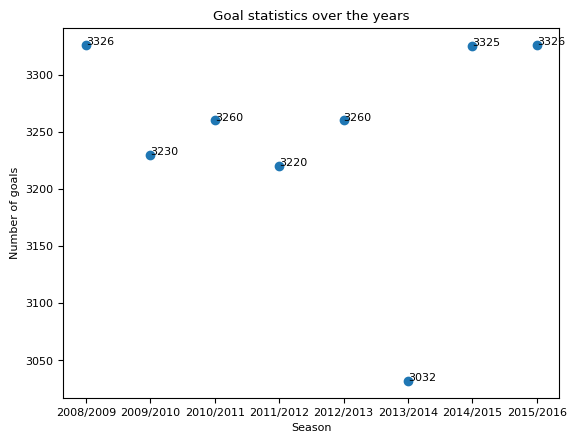

In [144]:
plt.scatter(df1['season'], df1['num_goals'])
plt.title('Goal statistics over the years')
plt.xlabel('Season')
plt.ylabel('Number of goals')
add_value_label(df1['season'], df1['num_goals'])
plt.rcParams.update({'font.size': 8})
plt.show()

Data shows that the the number of goals scored in european championships never dropped below 3000. The most fruitful seasons in terms of goals are 2008/2009 and 2015/2016. 

In [164]:
df2 = pd.read_sql_query(
"""SELECT a.name, b.num_goals from Country a, 
(SELECT country_id, COUNT(home_team_goal) as num_goals from Match
GROUP BY country_id) b
where a.id = b.country_id ORDER BY num_goals DESC""", con)

C:\Users\Illia\AppData\Local\Temp\ipykernel_4384\909015518.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=df2['name'],rotation=30)


[Text(0, 0, 'England'),
 Text(1, 0, 'France'),
 Text(2, 0, 'Spain'),
 Text(3, 0, 'Italy'),
 Text(4, 0, 'Germany'),
 Text(5, 0, 'Netherlands'),
 Text(6, 0, 'Portugal'),
 Text(7, 0, 'Poland'),
 Text(8, 0, 'Scotland'),
 Text(9, 0, 'Belgium'),
 Text(10, 0, 'Switzerland')]

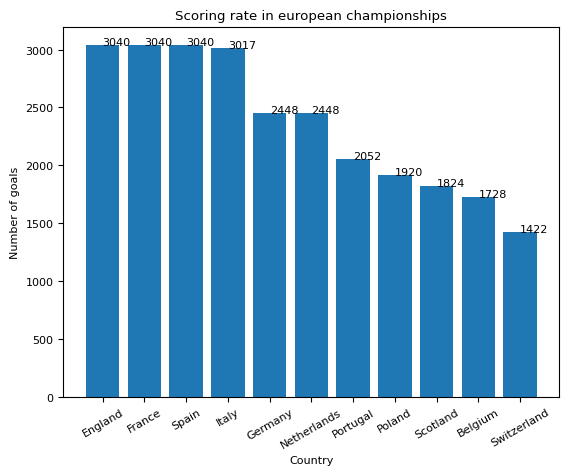

In [176]:
plt.bar(df2['name'], df2['num_goals'])

add_value_label(df2['name'], df2['num_goals'])
plt.title('Scoring rate in european championships')
plt.xlabel('Country')
plt.ylabel('Number of goals')
ax = plt.gca()
ax.set_xticklabels(labels=df2['name'],rotation=30)

TOP-3 championships by scoring are: English, French and Spanish.

In [221]:
df5 = pd.read_sql_query(
"""SELECT a.team_long_name as name, b.avg from Team a,
(SELECT home_team_api_id, AVG(avg_goals) as avg from (SELECT home_team_api_id, avg(home_team_goal) as avg_goals, Season
from Match GROUP BY home_team_api_id, season) GROUP BY home_team_api_id ORDER BY avg DESC LIMIT 5) b
WHERE a.team_api_id = b.home_team_api_id""", con)

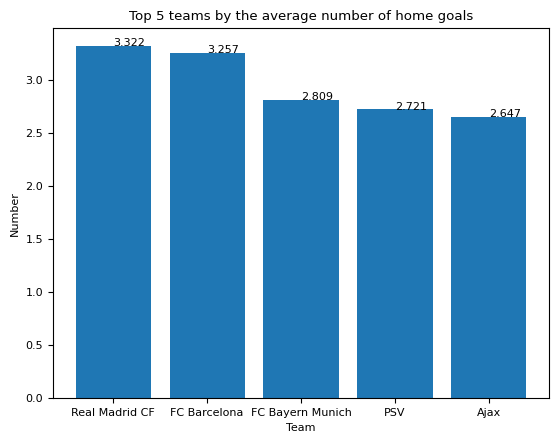

In [225]:
plt.bar(df5['name'], df5['avg'])
add_value_label(df5['name'], round(df5['avg'], 3))
plt.title('Top 5 teams by the average number of home goals')
plt.xlabel('Team')
plt.ylabel('Number')
plt.show()